# DICer: Directed Interaction Caller

We integrated all modules into a single script that evaluates, categorizes and selects directed and undirected reference  interactions at a given FDR threshold. The script can be executed as follows:

[INFO] Input parameters
	[INFO] --out-prefix: DEMO_1
	[INFO] --description-tag: DEMO 1
	[INFO] --diachromatic-interaction-file:
		[INFO] ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
	[INFO] --p-value-threshold: None
		[INFO] Will determine a P-value threshold so that the FDR is kept below: 0.05
		[INFO] --fdr-threshold: 0.05000
		[INFO] --nominal-alpha-max: 0.02500
		[INFO] --nominal-alpha-step: 0.00001
		[INFO] --iter-num: 100
		[INFO] --random-seed: 0
		[INFO] --thread-num: 2
		[INFO] Use '--fdr-threshold' to set your own FDR threshold.
		[INFO] Or use '--p-value-threshold' to skip the FDR procedure.

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz
	[INFO] Set size: 64,000
[INFO] ... done.

[INFO] Performing randomization analysis with 100 iterations ...
	[INFO] Determining number of significant interactions at each nominal alpha ...
	[INFO] Randomizing interactions ...
		[IN

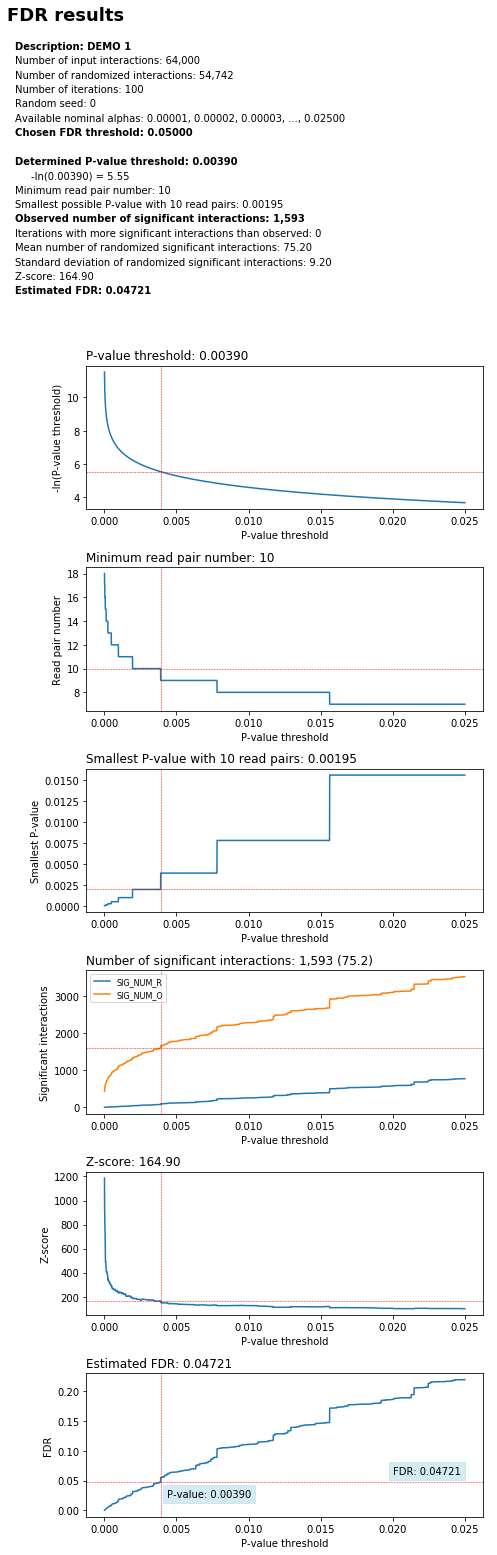

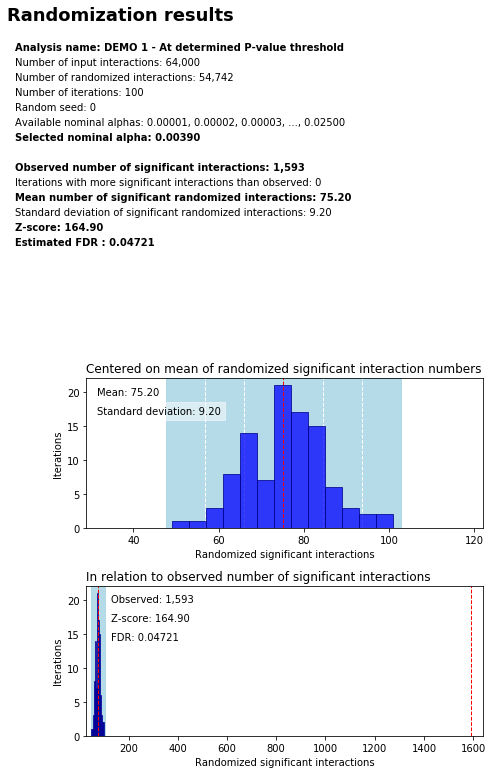

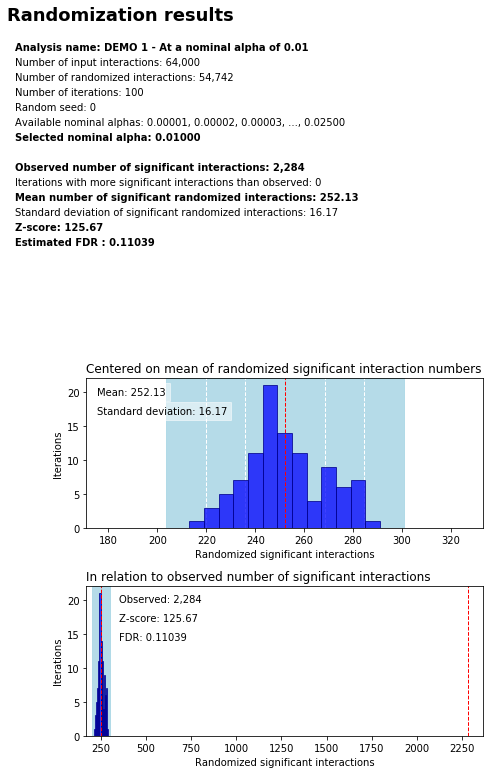

In [2]:
%run ../DICer.py \
--out-prefix DEMO_1 \
--description-tag "DEMO 1" \
--diachromatic-interaction-file ../tests/data/test_03/diachromatic_interaction_file_fdr_top_64000.tsv.gz \
--fdr-threshold 0.05 \
--nominal-alpha-max 0.02500 \
--nominal-alpha-step 0.00001 \
--iter-num 100 \
--random-seed 0 \
--thread-num 2

## Arguments

XX

## Generated files

XX